# __Welcome to the MMS Engineering Challenge!__

This notebook provides you some code to setup a MMS Data Engineering problem. There is no optimal solution, but many good answers. We only want to see if you know how to tackle the problem. There is a lot of room for your approach to the problem. 

Goal: We want you to predict the number of __sales_per_day__ (= label) with the given dataset and put it into production.


Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

In [1]:
import pandas as pd


data_path = 'data.csv' # maybe you have to modify this... 
data = pd.read_csv(data_path, sep=';')
print(data.head())

        brand  country currency  customers_per_day  outlet_id  week_id  \
0  MediaMarkt    spain     EURO             3138.0      100.0     34.0   
1      Saturn  germany     EURO              378.0       86.0      8.0   
2  MediaMarkt    italy     EURO              379.0      530.0     28.0   
3      Saturn  germany     EURO             3050.0       17.0     47.0   
4  MediaMarkt    spain     EURO              548.0      164.0      7.0   

  weekday  sales_per_day  
0     sat       72169.14  
1     mon       52825.62  
2     thu       53309.83  
3     sat       74237.45  
4     tue       56621.61  


# Challenge
Now it is your turn. Show us how you are tackeling this problem. You have complete freedom what you do.

## Exploration
The goal here is to better understand the underlying data e.g. in terms of completeness, distribution etc..

In [12]:
# TODO ... Python coding ... 
#
import pandas as pd
import numpy as np
import seaborn as sns
#
df = pd.read_csv("C:/Users/khurr/Documents/GitHub/MM/data.csv",sep=';')
df = df.sample(frac=1) #Shuffeling DF.
df

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
6780,MediaMarkt,switzerland,CHF,2012.0,421.0,11.0,fri,57839.82
17487,Saturn,netherlands,EURO,2884.0,698.0,32.0,sat,72622.36
16868,MediaMarkt,netherlands,EURO,839.0,694.0,49.0,tue,59254.09
13119,MediaMarkt,austria,EURO,500.0,399.0,41.0,tue,57599.32
852,MediaMarkt,netherlands,EURO,338.0,645.0,33.0,thu,56800.71
...,...,...,...,...,...,...,...,...
5569,MediaMarkt,spain,EURO,2831.0,106.0,34.0,sat,73451.56
8782,MediaMarkt,spain,EURO,363.0,142.0,17.0,thu,56734.23
16920,MediaMarkt,austria,EURO,322.0,342.0,28.0,thu,56429.73
7454,Saturn,germany,EURO,1513.0,81.0,6.0,sat,67550.09


In [13]:
def set_color():
    return ['gold','red', 'green', 'blue','purple','orange','black','brown']
#
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    print("TSUM",total_cells)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 6780 to 14396
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18174 non-null  object 
 1   country            18185 non-null  object 
 2   currency           18184 non-null  object 
 3   customers_per_day  18199 non-null  float64
 4   outlet_id          18194 non-null  float64
 5   week_id            18194 non-null  float64
 6   weekday            18170 non-null  object 
 7   sales_per_day      18193 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.3+ MB
            brand      country currency  customers_per_day  outlet_id  \
6780   MediaMarkt  switzerland      CHF             2012.0      421.0   
17487      Saturn  netherlands     EURO             2884.0      698.0   
16868  MediaMarkt  netherlands     EURO              839.0      694.0   
13119  MediaMarkt      austria     EURO              500.0      3

<AxesSubplot:>

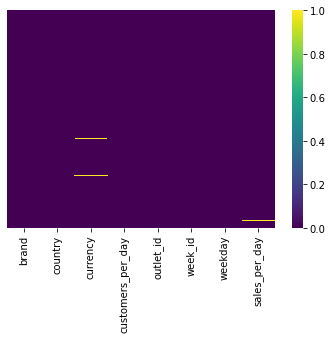

In [14]:
#How df looks like?
#
df_lookslike(df)# How DF looks like?
#Missing value visualization
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

# Data Preprocessing

# 1). Handling missing values
Data contains missing values thus i'm going to fix it at DF Level. Hence, Model doesn't confuse on Test_Data.

In [15]:
#Data Cleansing
#
#To fix messy oder missing data, i'd like to:
#Investigage the reason is this !recorded or doesn't exists?
#How many % of data is missing
#Discuss with an approach with source/concerned-team to build a consensus approach w.r.t Messy/missing data.
#Data Imputation: Either Update missing data with MEAN, try to guess, oder replace with a special characters/strings ('unknown')/0.
#The above line process called "imputation".
#
#Further, its NOT RECOMEND to remove Null/Missing Data until its in really small amount and major stackholder agree.

import seaborn as sns
df=df.replace(-999999.0,0)    #Replace ALL -99999 with 0 at DF Level----------------------------------
values = {'brand':'Unknown','country':'Unknown','currency':'Unknown','customers_per_day':0,'outlet_id':0,'week_id':0,'weekday':'Unknown','sales_per_day':0}
df=df.fillna(value=values)    #Exchange NULLs in ALL Columns with 'Unknown' Oder 0 at DF Level--------
df_lookslike(df)              #How dataframe looks like?
###


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 6780 to 14396
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18207 non-null  object 
 1   country            18207 non-null  object 
 2   currency           18207 non-null  object 
 3   customers_per_day  18207 non-null  float64
 4   outlet_id          18207 non-null  float64
 5   week_id            18207 non-null  float64
 6   weekday            18207 non-null  object 
 7   sales_per_day      18207 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.3+ MB
            brand      country currency  customers_per_day  outlet_id  \
6780   MediaMarkt  switzerland      CHF             2012.0      421.0   
17487      Saturn  netherlands     EURO             2884.0      698.0   
16868  MediaMarkt  netherlands     EURO              839.0      694.0   
13119  MediaMarkt      austria     EURO              500.0      3

# 2). Data Vectorization
Preparing Tensors (by applying different Encoding)

In [16]:
# I am going to convert data into numeric values by using following technique und check the score for each case.
########################################################################################################################################
#Test Case-1:Integer Encoding   :(
#Test Case-2:OneHot Encoding    :)
#Test Case-2:Dummy Variable     Encoding.
################################################Test Case-1:Integer Encoding (Manually)#################################################
#df['brand']=df['brand'].map({'MediaMarkt':1,'Saturn':2,'Unknown':0})
#df['country']=df['country'].map({'germany':1,'switzerland':2,'austria':3,'netherlands':4,'spain':5,'greece':6,'Unknown':0})
#df['country']=df['country'].fillna(0)
#df['currency']=df['currency'].map({'TWO':2,'FOUR':4})
#df['weekday']=df['weekday'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7,'Unknown':0}) #Not ideal as changing weightage
#print(df['brand'].unique())
#df_lookslike(df)              #How dataframe looks like?
################################################Test Case-2:One-Hot Encoding (via Pandas Manually)######################################
#df = pd.get_dummies(df, columns=['brand', 'country','weekday'])
################################################Test Case-3:Utilizing sklearn.preprocessing##############################################
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
#The below one is the same like TEST-CASE:1. Hence, take care when a column has only 02 values  (Male, Female) as weightage may vary.
df['brand']=label_enc.fit_transform(df['brand'])
df['country']=label_enc.fit_transform(df['country'])
df['currency']=label_enc.fit_transform(df['currency']) #Perhaps, later i drop it as i don't need. But lets see Heatmap based correlation.
df['weekday']=label_enc.fit_transform(df['weekday'])
print(df.head(5))

#Overfitting and Underfitting 
#Optimization:  The process of adjusting a model to get the best possible performance.
#generalization: How well Model works on unseen data. Model trained on huge data is better. Aber, it Overfits.
#Regularization: Process of fixing Overfitting.
# 1). Reducing N/W size ONLY on train data.
# 2). Add weight regularization (L1, L2)
# 3). Add dropout

       brand  country  currency  customers_per_day  outlet_id  week_id  \
6780       0        7         0             2012.0      421.0     11.0   
17487      1        5         1             2884.0      698.0     32.0   
16868      0        5         1              839.0      694.0     49.0   
13119      0        1         1              500.0      399.0     41.0   
852        0        5         1              338.0      645.0     33.0   

       weekday  sales_per_day  
6780         1       57839.82  
17487        3       72622.36  
16868        6       59254.09  
13119        6       57599.32  
852          5       56800.71  


# 3). Data Correlation
Identification of relationship/association b/w Dependent & Independent Variables

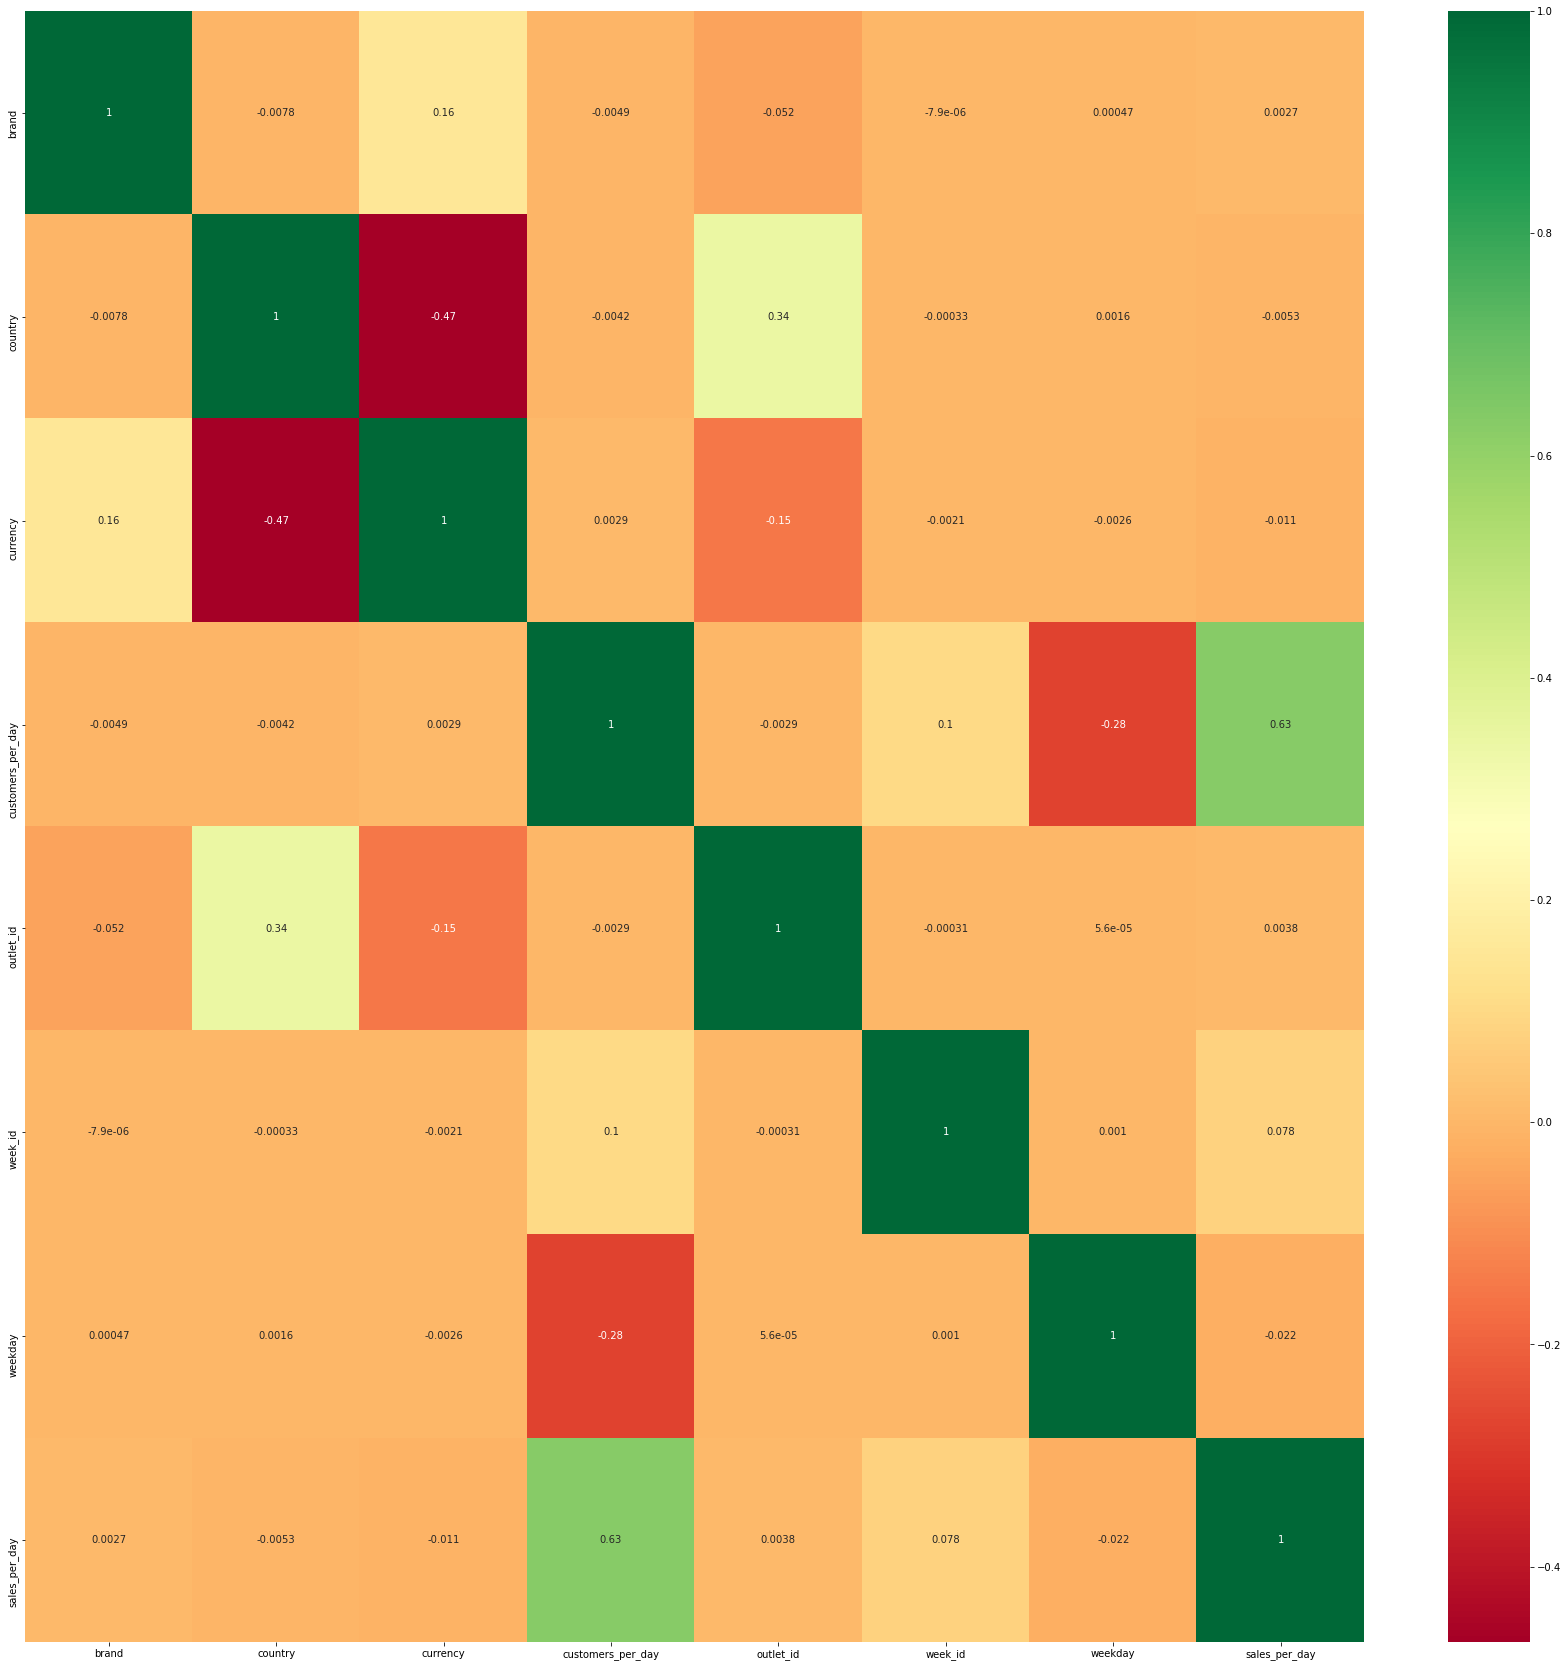

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#Analyzing correlation among all columns and Heatmap.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=dataframe%20corr#pandas.DataFrame.corr
# Helpful video: https://www.youtube.com/watch?v=ZynCwbZfCgY
#Remeber: Mean/Median/Mode/Std/Variance are "UNIVARIATE" i.e. it can be extracted on single column values.
#You can't extract (Mean/Median/Mode/Std/Variance) for more than 01 column.
#The word "CO" represents the relationship/association b/w TWO columns.
#Correlation is always b/w +1 and -1. If a relationship is ZERO or NEGATIVE then you may delete it.
#
#Remember:
#Among Two or more dependent variables/Features should not have high Correlation/relatinship. Example: t-type of Salt in your meal.
#Thus, you'll have to remove one dependent variable/feature as both are doing the same task.
#
#It ML we are performing Feature Engineering AND analyzing relationship with Correlation. However, in DEEPLEARNING its auto done.
#

corrmat = df.corr(method='pearson',min_periods=5) #pearson : standard correlation coefficient,
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 4). Feature Engineering

In [18]:
#Identifying from the above Heatamp which columns are strongly correlated or weakly correlated.
#I observed The Correlation between following columns were very weak.
# 1). sales_per_day vs 'weekday'=-0.022 Its a very weak correlation/association. Thus, require deletion.
# 2). sales_per_day vs 'currency'=-0.011 Its a very weak correlation/association. Thus, require deletion.
# 3). sales_per_day vs 'currency'=-0.0053 ts a very weak correlation/association. Thus, require deletion.
# Now, i'm removing weak correlated/relationship Independent Variable from df.
#
df.drop(columns=['weekday','currency','country'], inplace=True)
#
#Linear regression is a way to model the relationship between two variables.
#The slope formula: Y = m*X + b
#
# Y: Dependent variable (i.e Sales_per_day)
# X: Independent variable (All others/Features)
# m: The slope (i.e. how steep the line goes)
# b: The y-intercept/point where line cut the Y-axis
# 
# 
#
#
# I have to predict "Sales_per_day". Thus, its the 'Dependent Variable' (Y) and all others are Independent variable (X).
#The folllowing approach is safe as you don't modify your DF instead prefer to seperate Dependent & Independent Variable.
#Y = df["sales_per_day"] #Lets save this (Dependent/Target Variable)column for later usage and remove it from df.
Y=(df.loc[:,df.columns=='sales_per_day']) #Lets take Dependent Variable/Target column from df.
   
X=(df.loc[:,df.columns!='sales_per_day']) #Lets take Independent Variable/ALL Features column from df.
print("Following are X:\n",X)
print("\nFollowing is Y:\n",Y)
#
#
#
#Overfitting and Underfitting 
#Optimization:  The process of adjusting a model to get the best possible performance.
#generalization: How well Model works on unseen data. Model trained on huge data is better. Aber, it Overfits.
#Regularization: Process of fixing Overfitting.
# 1). Reducing N/W size ONLY on train data.
# 2). Add weight regularization (L1, L2)
# 3). Add dropout

Following are X:
        brand  customers_per_day  outlet_id  week_id
6780       0             2012.0      421.0     11.0
17487      1             2884.0      698.0     32.0
16868      0              839.0      694.0     49.0
13119      0              500.0      399.0     41.0
852        0              338.0      645.0     33.0
...      ...                ...        ...      ...
5569       0             2831.0      106.0     34.0
8782       0              363.0      142.0     17.0
16920      0              322.0      342.0     28.0
7454       1             1513.0       81.0      6.0
14396      0              536.0      598.0     38.0

[18207 rows x 4 columns]

Following is Y:
        sales_per_day
6780        57839.82
17487       72622.36
16868       59254.09
13119       57599.32
852         56800.71
...              ...
5569        73451.56
8782        56734.23
16920       56429.73
7454        67550.09
14396       52738.21

[18207 rows x 1 columns]


# 5). Data Spliting (Training, Test)

In [19]:
#splitting data into Training and Test(80 vs 20)
#
#Sogar, we may manually divide data. When doing manual work then don't forget to Shuffel.
#However, in sklearn function shuffel parameter by defaul is True. But Remember Timeseries data shouldn't be shufel :)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print("Training Data-x:/Features:", x_train.shape)
print("Training Data-Y/Target:", y_train.shape)
print("Test Data:", x_test.shape)

Training Data-x:/Features: (14565, 4)
Training Data-Y/Target: (14565, 1)
Test Data: (3642, 4)


# 6). Normalization
Do i need to Normalize data?

Its depending on your choice, exercise of your practice about how Model is behaving. You may /may Not do Normalization, try to understand how well model prediction is working. If its generating good result then perform and keep Normalization. If not then do not include in your model.

For this case-study, I did the Normalization and learned the results are unacceptable. 

Thus, i disabled this part.

In [20]:
#Normalization of 1st THREE columns for Training data
#
#xtrain_mean = df.iloc[:, :3].mean(axis=0)
#xtrain_std = df.iloc[:, :3].std(axis=0)
#
#df.iloc[:, :3] -= xtrain_mean
#df.iloc[:, :3] /= xtrain_std
#df

#Normalization of 1st THREE columns for Training data
#
#ytrain_mean = y_train.mean(axis=0)
#ytrain_std = y_train.std(axis=0)
#
#y_train -= ytrain_mean
#y_train /= ytrain_std
#y_train



# 7). Linear Regression
To make predictions in labeled sample data and the Data consists of predicting a continuous value.

In [21]:
# Building Regression Model
# Finding/establishing a linear relationship between dependant & independent variable.
#
#Linear Models: https://scikit-learn.org/stable/modules/linear_model.html
#
#Case-1): LinearRegression:

from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train,y_train) #We are training.
#LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
#
print('LR-Train score:',LR_model.score(x_train,y_train))
print('LR-Test score:' ,LR_model.score(x_test,y_test))
##returns the coefficient of determination or R². Its maximum is 1. The higher the R² value, the better the fit.

LR-Train score: 0.3973976424274054
LR-Test score: 0.39878816038482945


# 8). The Regression model & most optimal coefficients for all the attributes

In [22]:
coeff_df = pd.DataFrame(LR_model.coef_, X.columns, columns=['Coefficient'])
print("Coefficient:",coeff_df)
##returns the coefficient of determination or R². Its maximum is 1. The higher the R² value, the better the fit.

ValueError: Shape of passed values is (1, 4), indices imply (4, 1)

# 9). Actual Vs Prediction

In [23]:
y_pred = LR_model.predict(x_test)
predf=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predf

ValueError: If using all scalar values, you must pass an index

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.scatter(y_test,y_pred)
#plt.plot(y_test,y_pred,color='blue')
##Cosmetics
#plt.xlabel("Target Value")
#plt.ylabel("Predicting Target Value")
#plt.title("Predicted vs. Actual Values");
##
#plt.show()
########

# 10). Mean Error (AE,SE,MSE)

In [25]:
from sklearn import metrics
print('Mean A.Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean S.Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root M.Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MSQ oder the difference between the original values and the predicted values is coming too high :(
#Evaluate the Model


Mean A.Error: 13703.050920626552
Mean S.Error: 302849890.8251466
Root M.Squared Error: 17402.582877985285


# Conculsion:

In [106]:
#Evaluate the Model

#1. I used Machine learning, Deeplearning (normalizationa, auto featuring). Still need time
#2. Perhpas more data required,
#3. Bad guess
#4. Feature improper selection

#Leider, nicht 100% erfolgreich. Ich brauche auch mehr learnen und unbung machen!#

In [ ]:
Prepared by:
    
    
    Khurram Nazir
    
    Khurram.deutsch@yahoo.com
    +49-151-4518-2723
    München
    Germany.

## Modelling
Choose a suitable model for predicting the sales_per_day and validating the prediction accuracy. Train and test the model.

In [ ]:
# TODO ... Python coding ... 

## Business Problem
What other retail data could be relevant to predict the sales_per_day? Give at least 5 different examples and explain in 2-3 sentences why they could be interesting to add to the model.

In [ ]:
# TODO ... write down your ideas ...

# Architecture 

Now pretend you need to build a system which runs the model and should be able to make realtime predictions of the sales per day, everytime new data is generated by the source systems.  
You need to design (a) data pipeline(s) which transfers the data from either the sourcesystems or BigQuery to the prediction engine in the format the model/prediction engine can handle it. 

There are the following preconditions: 
    
    - There are 3 source systems: 
        - System A: System which handles __sales_per_day__ --> API Connector (Real-Time possible)
        - System B: Delivers customers_per_day --> Flat File on SFTP Server once per Day per batch
        - System C: Stores brand, country, currency and outled_id --> BigQuery    
        - You want to enable realtime predictions
    
    - You can use any component you like and would use for that use case. Please add to each logical component for your architecture a respective tool or GCP service. (e.g. for the logical component ETL a tool named Google Dataflow)

Please describe how your architecure would look like with an architecture picture. Describe how the different components will be connected and communicate. Please elaborate why you have choosen a certain logical component + tooling. We expect a moderate level of details within the architecture 

# Send it to us
In the end, please send us: 
    - The ipython notebook 
    - An detailed description of your architecture + an architecture picture (PDF). 